<a href="https://colab.research.google.com/github/PetrBonyuk/data_analysis/blob/main/klaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Загрузите файл с вашего компьютера
uploaded = files.upload()

Saving as.xlsx to as.xlsx


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data  = pd.read_excel("as.xlsx")


label_encoder = LabelEncoder()


data_encoded=data

data_encoded

scaler = StandardScaler()
data_encoded_standardize = data_encoded

data_encoded_standardize



,Возраст,Годовой доход (тыс. руб.),Количество покупок за год,Средний чек (руб.),Пол_encoded,Тип товара_encoded
0,25,500,10,1500,1,2
1,34,800,5,3000,0,1
2,29,600,8,2000,0,2
3,45,1200,12,2500,1,0
4,56,900,7,4000,0,1
5,22,300,15,1000,1,2
6,38,750,6,3500,0,0
7,50,1100,9,2800,1,1
8,31,650,11,1800,0,2
9,40,950,8,3200,1,0


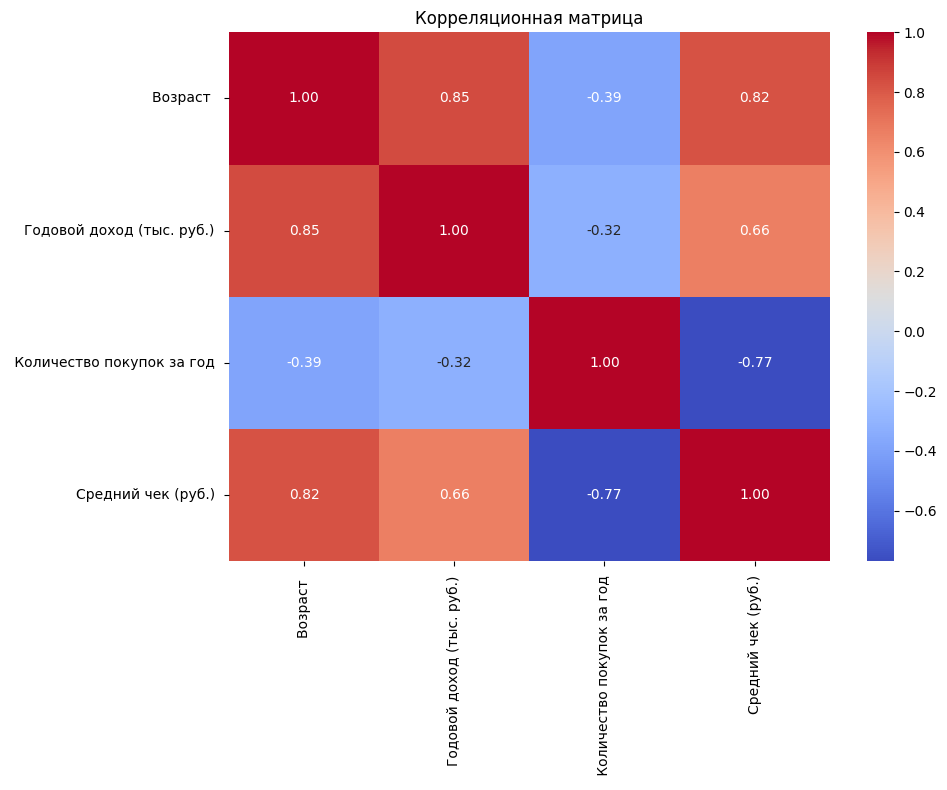

In [4]:

# Исключаем последние два признака
data_filtered = data.iloc[:, :-2]

# Строим корреляционную матрицу
correlation_matrix = data_filtered.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

### Анализ корреляции:

1. **Возраст и Годовой доход (тыс. руб.)**:
   - **Коэффициент корреляции: 0.847**
   - **Интерпретация**: Сильная положительная корреляция. Это означает, что с увеличением возраста, как правило, увеличивается годовой доход. Это может быть связано с карьерным ростом и накоплением опыта.

2. **Возраст и Средний чек (руб.)**:
   - **Коэффициент корреляции: 0.821**
   - **Интерпретация**: Сильная положительная корреляция. С увеличением возраста средний чек покупок также увеличивается. Возможно, это связано с более высокими доходами и изменением потребительских привычек.

3. **Годовой доход (тыс. руб.) и Средний чек (руб.)**:
   - **Коэффициент корреляции: 0.665**
   - **Интерпретация**: Умеренная положительная корреляция. Чем выше годовой доход, тем выше средний чек. Это логично, так как люди с большим доходом могут позволить себе более дорогие покупки.

4. **Количество покупок за год и Средний чек (руб.)**:
   - **Коэффициент корреляции: -0.769**
   - **Интерпретация**: Сильная отрицательная корреляция. Чем больше количество покупок, тем ниже средний чек. Это может указывать на то, что люди, совершающие много покупок, склонны покупать более дешевые товары, а те, кто совершает меньше покупок, выбирают более дорогие товары.

5. **Возраст и Количество покупок за год**:
   - **Коэффициент корреляции: -0.385**
   - **Интерпретация**: Слабая отрицательная корреляция. С увеличением возраста количество покупок немного снижается. Возможно, это связано с изменением потребительских привычек или уменьшением потребности в частых покупках.

6. **Годовой доход (тыс. руб.) и Количество покупок за год**:
   - **Коэффициент корреляции: -0.320**
   - **Интерпретация**: Слабая отрицательная корреляция. Чем выше годовой доход, тем меньше количество покупок. Это может быть связано с тем, что люди с высоким доходом совершают меньше, но более дорогих покупок.

---

### Выводы:
- **Сильнее всего коррелируют**:
  - Возраст и Годовой доход (0.847).
  - Возраст и Средний чек (0.821).
  - Количество покупок за год и Средний чек (-0.769).

- **Интерпретация**:
  - Возраст является ключевым фактором, влияющим на годовой доход и средний чек.
  - Люди с высоким доходом склонны совершать меньше покупок, но с более высоким средним чеком.
  - Отрицательная корреляция между количеством покупок и средним чеком указывает на две разные стратегии потребления: частые покупки дешевых товаров или редкие покупки дорогих товаров.


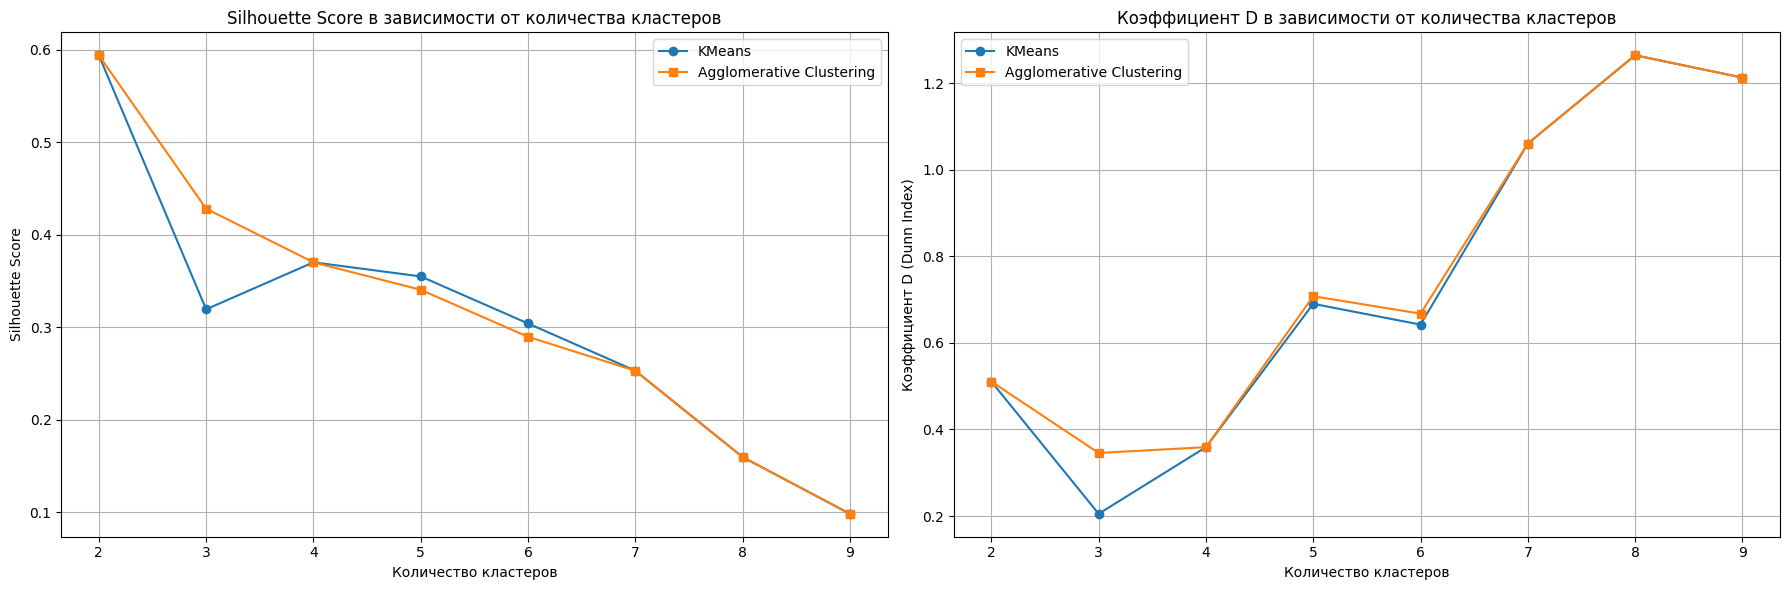

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances

# Диапазон количества кластеров
cluster_range = range(2, 10)

# Списки для хранения значений Silhouette Score
kmeans_scores = []
agglo_scores = []

# Списки для хранения значений коэффициента D
kmeans_dunn = []
agglo_dunn = []

# Функция для вычисления коэффициента D
def dunn_index(data, labels):
    distances = pairwise_distances(data)
    unique_labels = np.unique(labels)
    max_intra_cluster_distance = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = pairwise_distances(cluster_points)
            max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))
    min_inter_cluster_distance = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances = pairwise_distances(cluster_i, cluster_j)
            min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_distances))
    return min_inter_cluster_distance / max_intra_cluster_distance

# Вычисление Silhouette Score и коэффициента D для каждого количества кластеров
for k in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_encoded_standardize)
    kmeans_scores.append(silhouette_score(data_encoded_standardize, kmeans_labels))
    kmeans_dunn.append(dunn_index(data_encoded_standardize, kmeans_labels))

    # AgglomerativeClustering
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo_labels = agglo.fit_predict(data_encoded_standardize)
    agglo_scores.append(silhouette_score(data_encoded_standardize, agglo_labels))
    agglo_dunn.append(dunn_index(data_encoded_standardize, agglo_labels))

# Построение графиков
plt.figure(figsize=(18, 6))

# График Silhouette Score
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, 1-й график
plt.plot(cluster_range, kmeans_scores, marker='o', label='KMeans')
plt.plot(cluster_range, agglo_scores, marker='s', label='Agglomerative Clustering')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score в зависимости от количества кластеров')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

# График коэффициента D
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, 2-й график
plt.plot(cluster_range, kmeans_dunn, marker='o', label='KMeans')
plt.plot(cluster_range, agglo_dunn, marker='s', label='Agglomerative Clustering')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент D (Dunn Index)')
plt.title('Коэффициент D в зависимости от количества кластеров')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Исходя из полученных значений коэффициента D и Silhouette Score, были реализованы методы К-средних и Иерархического метода при различном количестве кластеров:

KMeans Silhouette Score: 0.5941
KMeans Dunn Index: 0.5107


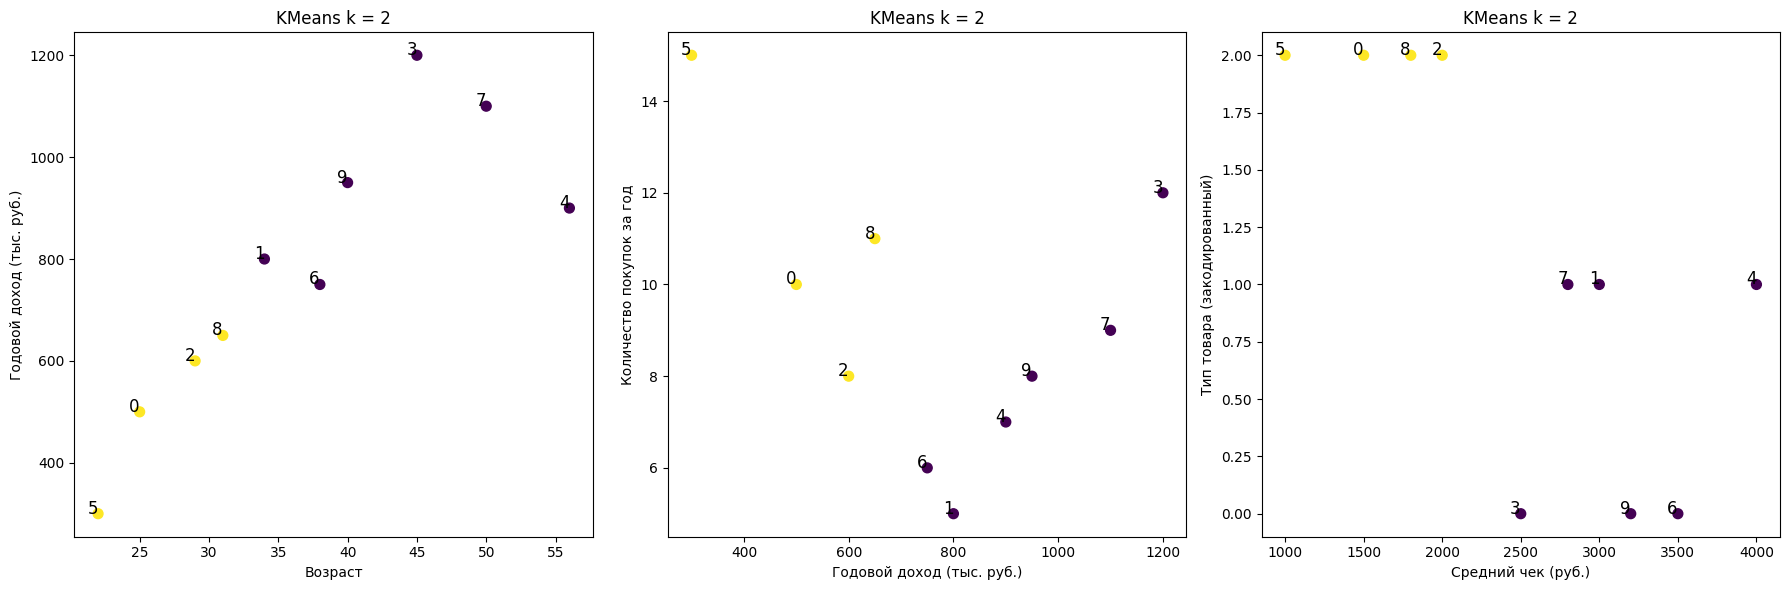

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Функция для вычисления коэффициента D
def dunn_index(data, labels):
    distances = pairwise_distances(data)
    unique_labels = np.unique(labels)
    max_intra_cluster_distance = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = pairwise_distances(cluster_points)
            max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))
    min_inter_cluster_distance = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances = pairwise_distances(cluster_i, cluster_j)
            min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_distances))
    return min_inter_cluster_distance / max_intra_cluster_distance

# KMeans с 2 кластерами
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels_2 = kmeans.fit_predict(data_encoded_standardize)
kmeans_silhouette_2 = silhouette_score(data_encoded_standardize, kmeans_labels_2)
kmeans_dunn_2 = dunn_index(data_encoded_standardize, kmeans_labels_2)

print(f"KMeans Silhouette Score: {kmeans_silhouette_2:.4f}")
print(f"KMeans Dunn Index: {kmeans_dunn_2:.4f}")

# Построение графиков
plt.figure(figsize=(18, 6))

# Возраст и доходы
plt.subplot(1, 3, 1)
scatter = plt.scatter(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1], c=kmeans_labels_2, cmap='viridis', s=50)
plt.xlabel('Возраст')
plt.ylabel('Годовой доход (тыс. руб.)')
plt.title('KMeans k = 2')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Доходы и количество покупок
plt.subplot(1, 3, 2)
plt.scatter(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2], c=kmeans_labels_2, cmap='viridis', s=50)
plt.xlabel('Годовой доход (тыс. руб.)')
plt.ylabel('Количество покупок за год')
plt.title('KMeans k = 2')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Средний чек и тип товара
plt.subplot(1, 3, 3)
plt.scatter(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5], c=kmeans_labels_2, cmap='viridis', s=50)
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Тип товара (закодированный)')
plt.title('KMeans k = 2')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

plt.tight_layout()
plt.show()

KMeans Silhouette Score: 0.3193
KMeans Dunn Index: 0.2051


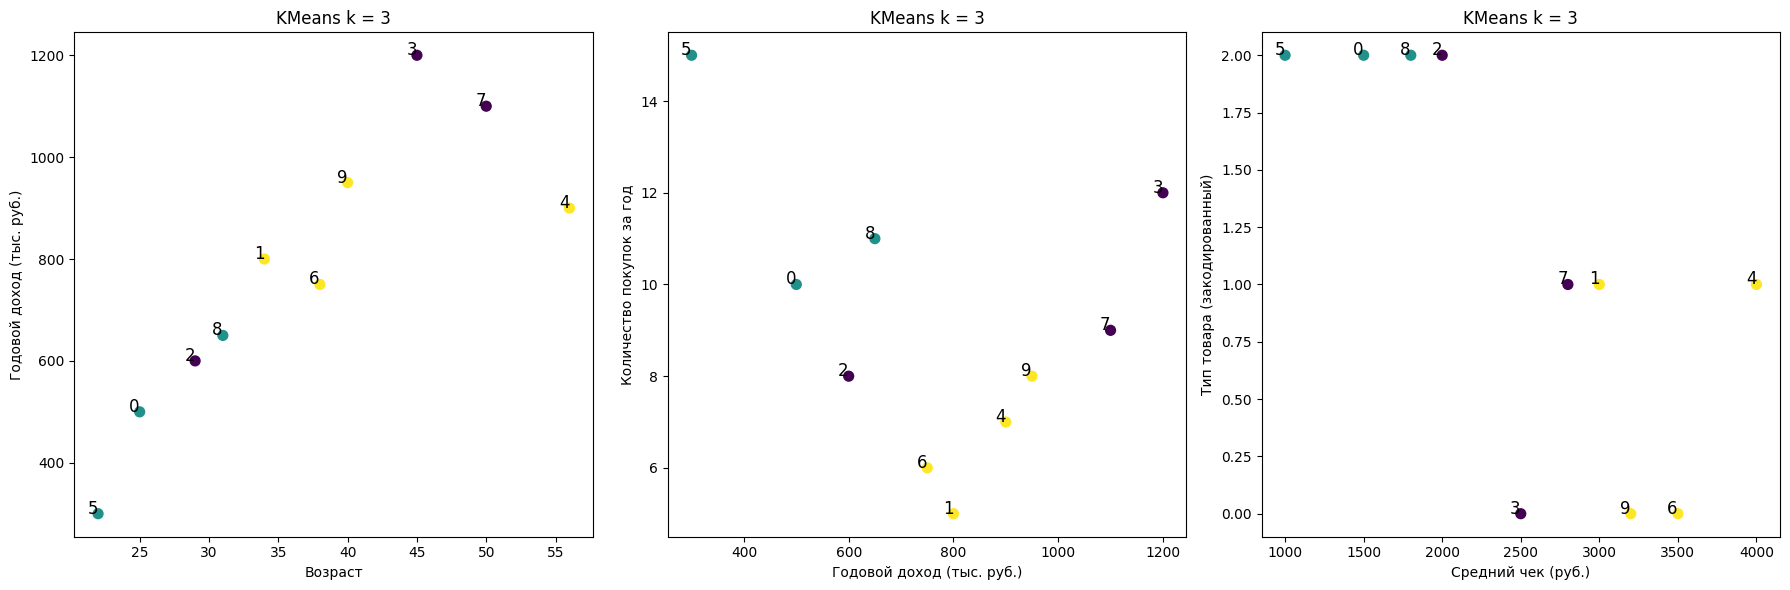

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib.pyplot as plt
import numpy as np

# Функция для вычисления коэффициента D
def dunn_index(data, labels):
    distances = pairwise_distances(data)
    unique_labels = np.unique(labels)
    max_intra_cluster_distance = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = pairwise_distances(cluster_points)
            max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))
    min_inter_cluster_distance = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances = pairwise_distances(cluster_i, cluster_j)
            min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_distances))
    return min_inter_cluster_distance / max_intra_cluster_distance

# KMeans с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels_3 = kmeans.fit_predict(data_encoded_standardize)
kmeans_silhouette_3 = silhouette_score(data_encoded_standardize, kmeans_labels_3)
kmeans_dunn_3 = dunn_index(data_encoded_standardize, kmeans_labels_3)

print(f"KMeans Silhouette Score: {kmeans_silhouette_3:.4f}")
print(f"KMeans Dunn Index: {kmeans_dunn_3:.4f}")

# Построение графиков
plt.figure(figsize=(18, 6))

# Возраст и доходы
plt.subplot(1, 3, 1)
plt.scatter(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1], c=kmeans_labels_3, cmap='viridis', s=50)
plt.xlabel('Возраст')
plt.ylabel('Годовой доход (тыс. руб.)')
plt.title(f'KMeans k = 3')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Доходы и количество покупок
plt.subplot(1, 3, 2)
plt.scatter(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2], c=kmeans_labels_3, cmap='viridis', s=50)
plt.xlabel('Годовой доход (тыс. руб.)')
plt.ylabel('Количество покупок за год')
plt.title(f'KMeans k = 3')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Средний чек и тип товара
plt.subplot(1, 3, 3)
plt.scatter(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5], c=kmeans_labels_3, cmap='viridis', s=50)
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Тип товара (закодированный)')
plt.title(f'KMeans k = 3')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

plt.tight_layout()
plt.show()

KMeans Silhouette Score: 0.3701
KMeans Dunn Index: 0.3591


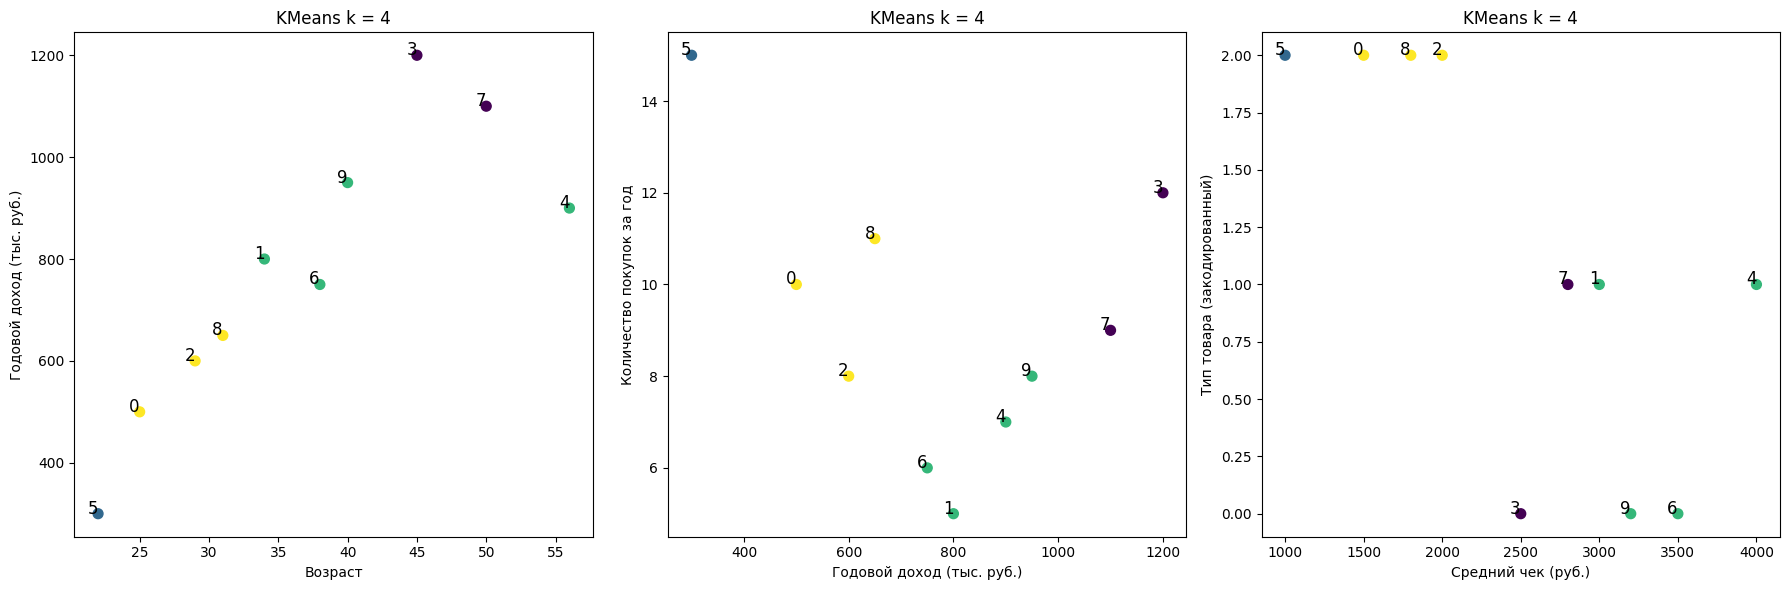

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib.pyplot as plt
import numpy as np

# Функция для вычисления коэффициента D
def dunn_index(data, labels):
    distances = pairwise_distances(data)
    unique_labels = np.unique(labels)
    max_intra_cluster_distance = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = pairwise_distances(cluster_points)
            max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))
    min_inter_cluster_distance = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances = pairwise_distances(cluster_i, cluster_j)
            min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_distances))
    return min_inter_cluster_distance / max_intra_cluster_distance

# KMeans с 4 кластерами
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels_4 = kmeans.fit_predict(data_encoded_standardize)
kmeans_silhouette_4 = silhouette_score(data_encoded_standardize, kmeans_labels_4)
kmeans_dunn_4 = dunn_index(data_encoded_standardize, kmeans_labels_4)

print(f"KMeans Silhouette Score: {kmeans_silhouette_4:.4f}")
print(f"KMeans Dunn Index: {kmeans_dunn_4:.4f}")

# Построение графиков
plt.figure(figsize=(18, 6))

# Возраст и доходы
plt.subplot(1, 3, 1)
plt.scatter(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1], c=kmeans_labels_4, cmap='viridis', s=50)
plt.xlabel('Возраст')
plt.ylabel('Годовой доход (тыс. руб.)')
plt.title(f'KMeans k = 4')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Доходы и количество покупок
plt.subplot(1, 3, 2)
plt.scatter(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2], c=kmeans_labels_4, cmap='viridis', s=50)
plt.xlabel('Годовой доход (тыс. руб.)')
plt.ylabel('Количество покупок за год')
plt.title(f'KMeans k = 4')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Средний чек и тип товара
plt.subplot(1, 3, 3)
plt.scatter(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5], c=kmeans_labels_4, cmap='viridis', s=50)
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Тип товара (закодированный)')
plt.title(f'KMeans k = 4')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

plt.tight_layout()
plt.show()

KMeans Silhouette Score (k=7): 0.2528
KMeans Dunn Index (k=7): 1.0607


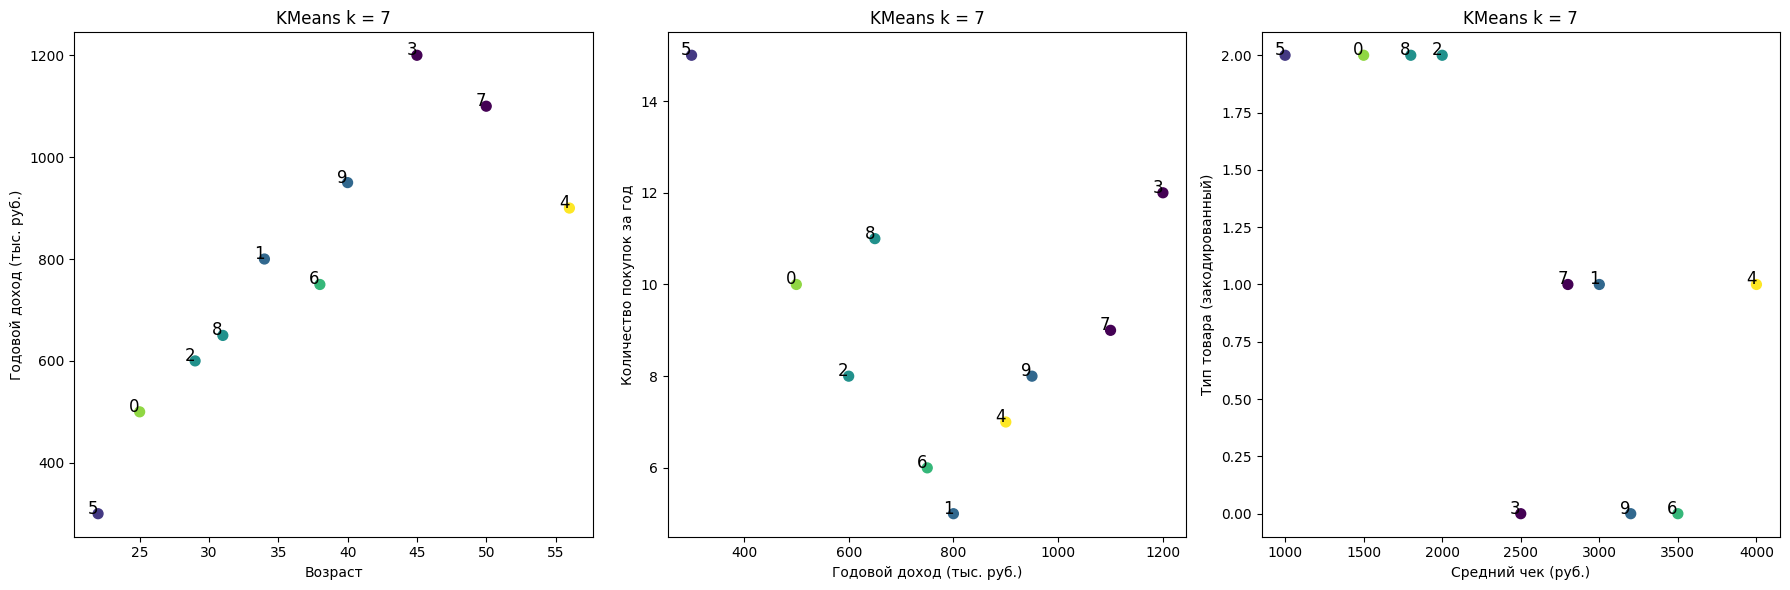

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib.pyplot as plt
import numpy as np

# Функция для вычисления коэффициента D
def dunn_index(data, labels):
    distances = pairwise_distances(data)
    unique_labels = np.unique(labels)
    max_intra_cluster_distance = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = pairwise_distances(cluster_points)
            max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))
    min_inter_cluster_distance = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances = pairwise_distances(cluster_i, cluster_j)
            min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_distances))
    return min_inter_cluster_distance / max_intra_cluster_distance

# KMeans с 7 кластерами
kmeans_7 = KMeans(n_clusters=7, random_state=42)
kmeans_labels_7 = kmeans_7.fit_predict(data_encoded_standardize)
kmeans_silhouette_7 = silhouette_score(data_encoded_standardize, kmeans_labels_7)
kmeans_dunn_7 = dunn_index(data_encoded_standardize, kmeans_labels_7)

print(f"KMeans Silhouette Score (k=7): {kmeans_silhouette_7:.4f}")
print(f"KMeans Dunn Index (k=7): {kmeans_dunn_7:.4f}")


# Визуализация результатов для KMeans с 7 кластерами
plt.figure(figsize=(18, 6))

# Возраст и доходы
plt.subplot(1, 3, 1)
plt.scatter(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1], c=kmeans_labels_7, cmap='viridis', s=50)
plt.xlabel('Возраст')
plt.ylabel('Годовой доход (тыс. руб.)')
plt.title('KMeans k = 7')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Доходы и количество покупок
plt.subplot(1, 3, 2)
plt.scatter(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2], c=kmeans_labels_7, cmap='viridis', s=50)
plt.xlabel('Годовой доход (тыс. руб.)')
plt.ylabel('Количество покупок за год')
plt.title('KMeans k = 7')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Средний чек и тип товара
plt.subplot(1, 3, 3)
plt.scatter(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5], c=kmeans_labels_7, cmap='viridis', s=50)
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Тип товара (закодированный)')
plt.title('KMeans k = 7')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

plt.tight_layout()
plt.show()



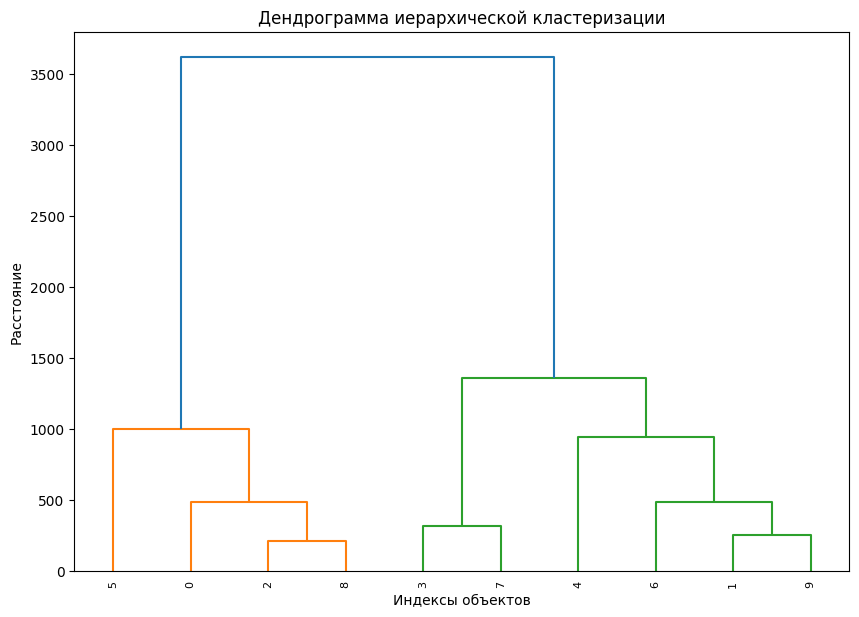

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Вычисляем linkage matrix для иерархической кластеризации
Z = linkage(data_encoded_standardize, method='ward')

# Построение дендрограммы
plt.figure(figsize=(10, 7))
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Индексы объектов')
plt.ylabel('Расстояние')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., labels=data_encoded_standardize.index)
plt.show()

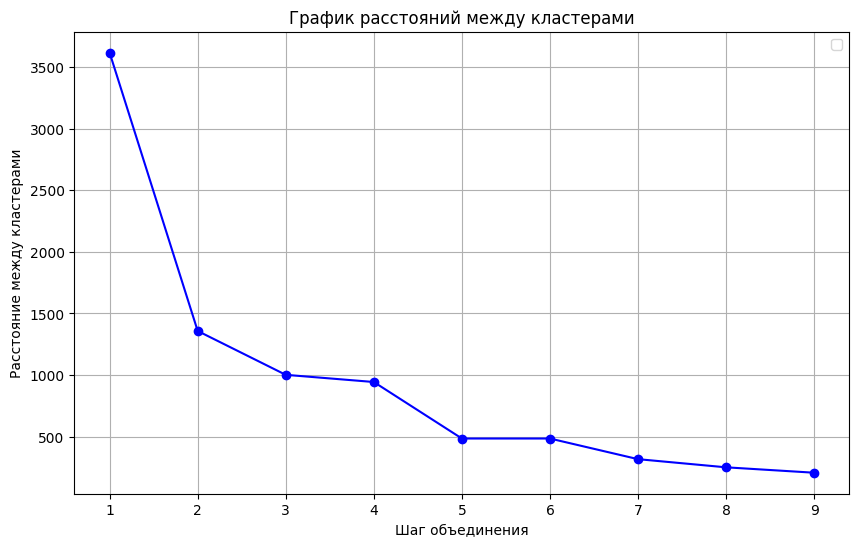

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Предположим, что data_encoded_standardize — это ваш стандартизированный набор данных
Z = linkage(data_encoded_standardize, method='ward')  # Уже вычислено ранее

# Построение графика расстояний между кластерами
plt.figure(figsize=(10, 6))
plt.title('График расстояний между кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние между кластерами')

# Извлекаем расстояния из матрицы связей Z
distances = Z[:, 2]  # Третий столбец Z содержит расстояния между объединяемыми кластерами

# Построение графика
plt.plot(range(1, len(distances) + 1), distances[::-1], marker='o', linestyle='-', color='b')

# Добавляем вертикальную линию для выбора оптимального количества кластеров

plt.legend()
plt.grid()
plt.show()

Agglomerative Clustering Silhouette Score (k=2): 0.5941
Agglomerative Clustering Dunn Index (k=2): 0.5107


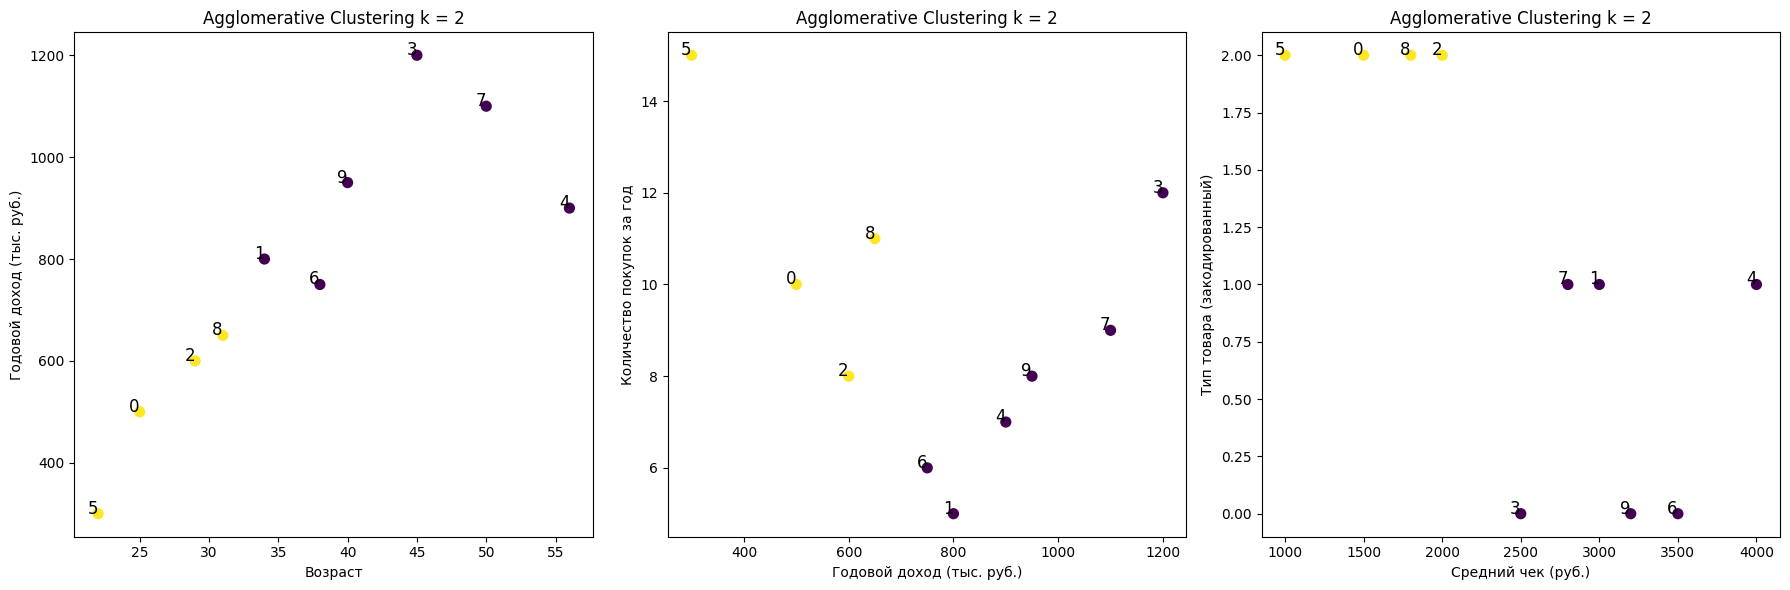

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib.pyplot as plt
import numpy as np

# Функция для вычисления коэффициента D
def dunn_index(data, labels):
    distances = pairwise_distances(data)
    unique_labels = np.unique(labels)
    max_intra_cluster_distance = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = pairwise_distances(cluster_points)
            max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))
    min_inter_cluster_distance = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances = pairwise_distances(cluster_i, cluster_j)
            min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_distances))
    return min_inter_cluster_distance / max_intra_cluster_distance

# Иерархическая кластеризация с 2 кластерами
agglo_2 = AgglomerativeClustering(n_clusters=2)
agglo_labels_2 = agglo_2.fit_predict(data_encoded_standardize)
agglo_silhouette_2 = silhouette_score(data_encoded_standardize, agglo_labels_2)
agglo_dunn_2 = dunn_index(data_encoded_standardize, agglo_labels_2)

print(f"Agglomerative Clustering Silhouette Score (k=2): {agglo_silhouette_2:.4f}")
print(f"Agglomerative Clustering Dunn Index (k=2): {agglo_dunn_2:.4f}")

# Визуализация результатов для 2 кластеров
plt.figure(figsize=(18, 6))

# Возраст и доходы
plt.subplot(1, 3, 1)
plt.scatter(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1], c=agglo_labels_2, cmap='viridis', s=50)
plt.xlabel('Возраст')
plt.ylabel('Годовой доход (тыс. руб.)')
plt.title(f'Agglomerative Clustering k = 2')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Доходы и количество покупок
plt.subplot(1, 3, 2)
plt.scatter(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2], c=agglo_labels_2, cmap='viridis', s=50)
plt.xlabel('Годовой доход (тыс. руб.)')
plt.ylabel('Количество покупок за год')
plt.title(f'Agglomerative Clustering k = 2')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Средний чек и тип товара
plt.subplot(1, 3, 3)
plt.scatter(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5], c=agglo_labels_2, cmap='viridis', s=50)
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Тип товара (закодированный)')
plt.title(f'Agglomerative Clustering k = 2')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

plt.tight_layout()
plt.show()

Agglomerative Clustering Silhouette Score (k=4): 0.3701
Agglomerative Clustering Dunn Index (k=4): 0.3591


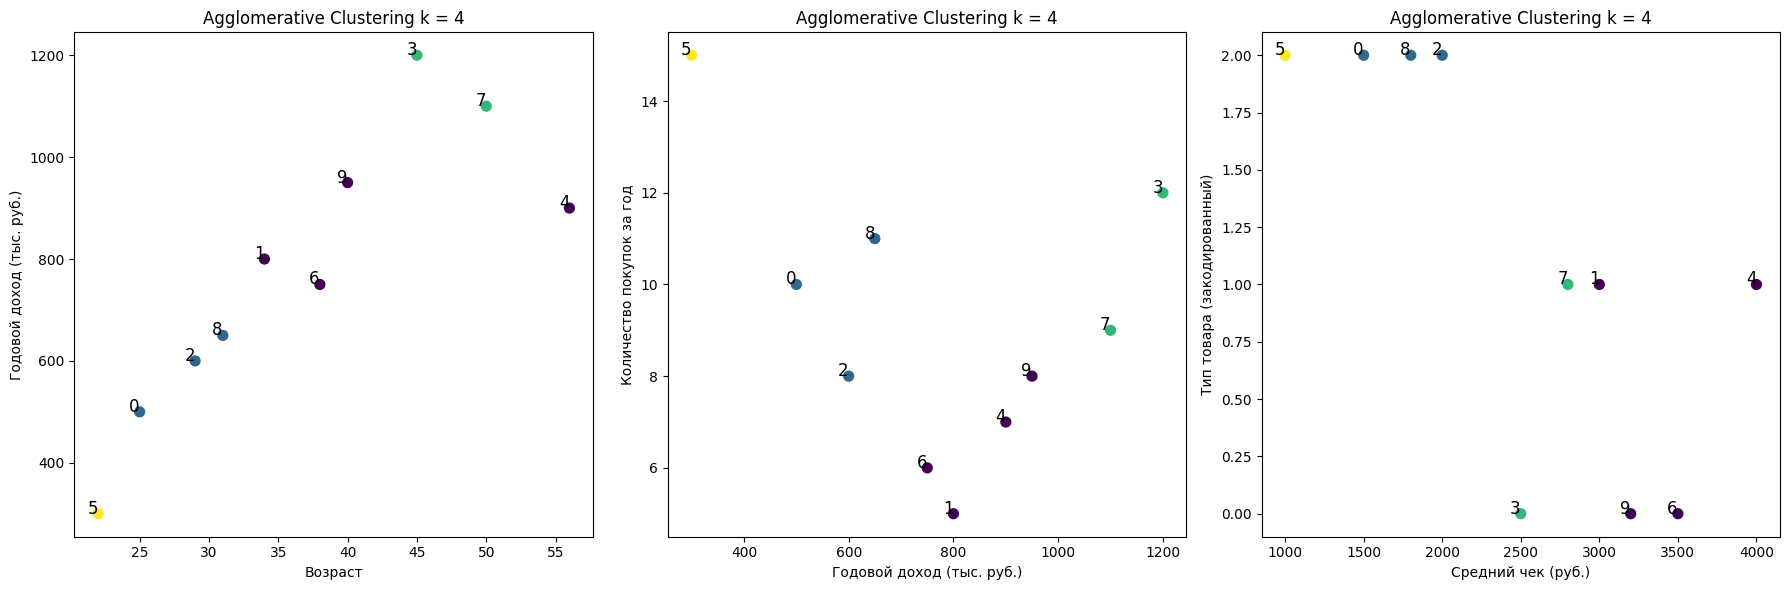

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib.pyplot as plt
import numpy as np

# Функция для вычисления коэффициента D
def dunn_index(data, labels):
    distances = pairwise_distances(data)
    unique_labels = np.unique(labels)
    max_intra_cluster_distance = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = pairwise_distances(cluster_points)
            max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))
    min_inter_cluster_distance = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances = pairwise_distances(cluster_i, cluster_j)
            min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_distances))
    return min_inter_cluster_distance / max_intra_cluster_distance

# Иерархическая кластеризация с 4 кластерами
agglo_4 = AgglomerativeClustering(n_clusters=4)
agglo_labels_4 = agglo_4.fit_predict(data_encoded_standardize)
agglo_silhouette_4 = silhouette_score(data_encoded_standardize, agglo_labels_4)
agglo_dunn_4 = dunn_index(data_encoded_standardize, agglo_labels_4)

print(f"Agglomerative Clustering Silhouette Score (k=4): {agglo_silhouette_4:.4f}")
print(f"Agglomerative Clustering Dunn Index (k=4): {agglo_dunn_4:.4f}")

# Визуализация результатов для 4 кластеров
plt.figure(figsize=(18, 6))

# Возраст и доходы
plt.subplot(1, 3, 1)
plt.scatter(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1], c=agglo_labels_4, cmap='viridis', s=50)
plt.xlabel('Возраст')
plt.ylabel('Годовой доход (тыс. руб.)')
plt.title('Agglomerative Clustering k = 4')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Доходы и количество покупок
plt.subplot(1, 3, 2)
plt.scatter(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2], c=agglo_labels_4, cmap='viridis', s=50)
plt.xlabel('Годовой доход (тыс. руб.)')
plt.ylabel('Количество покупок за год')
plt.title('Agglomerative Clustering k = 4')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Средний чек и тип товара
plt.subplot(1, 3, 3)
plt.scatter(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5], c=agglo_labels_4, cmap='viridis', s=50)
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Тип товара (закодированный)')
plt.title('Agglomerative Clustering k = 4')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

plt.tight_layout()
plt.show()

Agglomerative Clustering Silhouette Score (k=5): 0.3404
Agglomerative Clustering Dunn Index (k=5): 0.7078


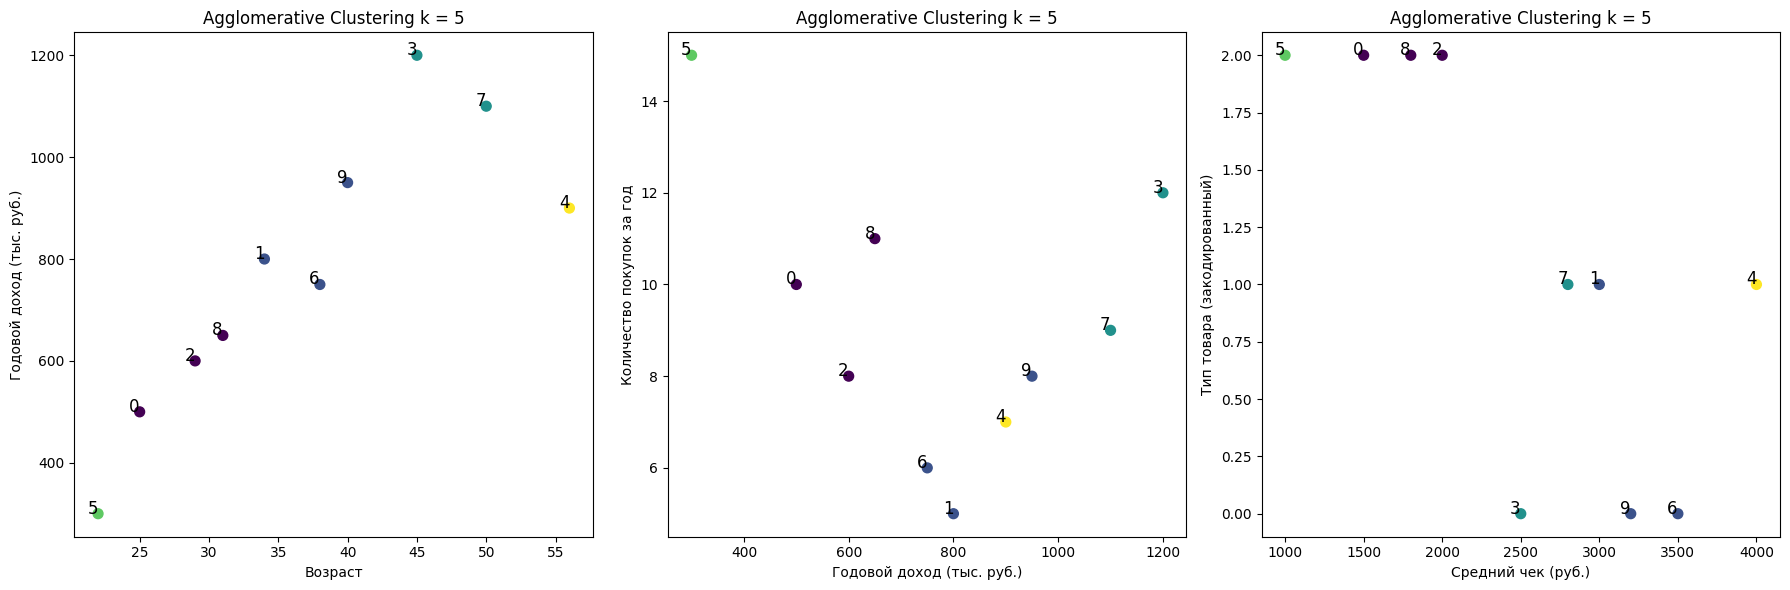

In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib.pyplot as plt
import numpy as np

# Функция для вычисления коэффициента D
def dunn_index(data, labels):
    distances = pairwise_distances(data)
    unique_labels = np.unique(labels)
    max_intra_cluster_distance = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = pairwise_distances(cluster_points)
            max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))
    min_inter_cluster_distance = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances = pairwise_distances(cluster_i, cluster_j)
            min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_distances))
    return min_inter_cluster_distance / max_intra_cluster_distance

# Иерархическая кластеризация с 5 кластерами
agglo_5 = AgglomerativeClustering(n_clusters=5)
agglo_labels_5 = agglo_5.fit_predict(data_encoded_standardize)
agglo_silhouette_5 = silhouette_score(data_encoded_standardize, agglo_labels_5)
agglo_dunn_5 = dunn_index(data_encoded_standardize, agglo_labels_5)

print(f"Agglomerative Clustering Silhouette Score (k=5): {agglo_silhouette_5:.4f}")
print(f"Agglomerative Clustering Dunn Index (k=5): {agglo_dunn_5:.4f}")

# Визуализация результатов для 5 кластеров
plt.figure(figsize=(18, 6))

# Возраст и доходы
plt.subplot(1, 3, 1)
plt.scatter(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1], c=agglo_labels_5, cmap='viridis', s=50)
plt.xlabel('Возраст')
plt.ylabel('Годовой доход (тыс. руб.)')
plt.title('Agglomerative Clustering k = 5')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Доходы и количество покупок
plt.subplot(1, 3, 2)
plt.scatter(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2], c=agglo_labels_5, cmap='viridis', s=50)
plt.xlabel('Годовой доход (тыс. руб.)')
plt.ylabel('Количество покупок за год')
plt.title('Agglomerative Clustering k = 5')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Средний чек и тип товара
plt.subplot(1, 3, 3)
plt.scatter(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5], c=agglo_labels_5, cmap='viridis', s=50)
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Тип товара (закодированный)')
plt.title('Agglomerative Clustering k = 5')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

plt.tight_layout()
plt.show()

Agglomerative Clustering Silhouette Score (k=7): 0.2528
Agglomerative Clustering Dunn Index (k=7): 1.0607


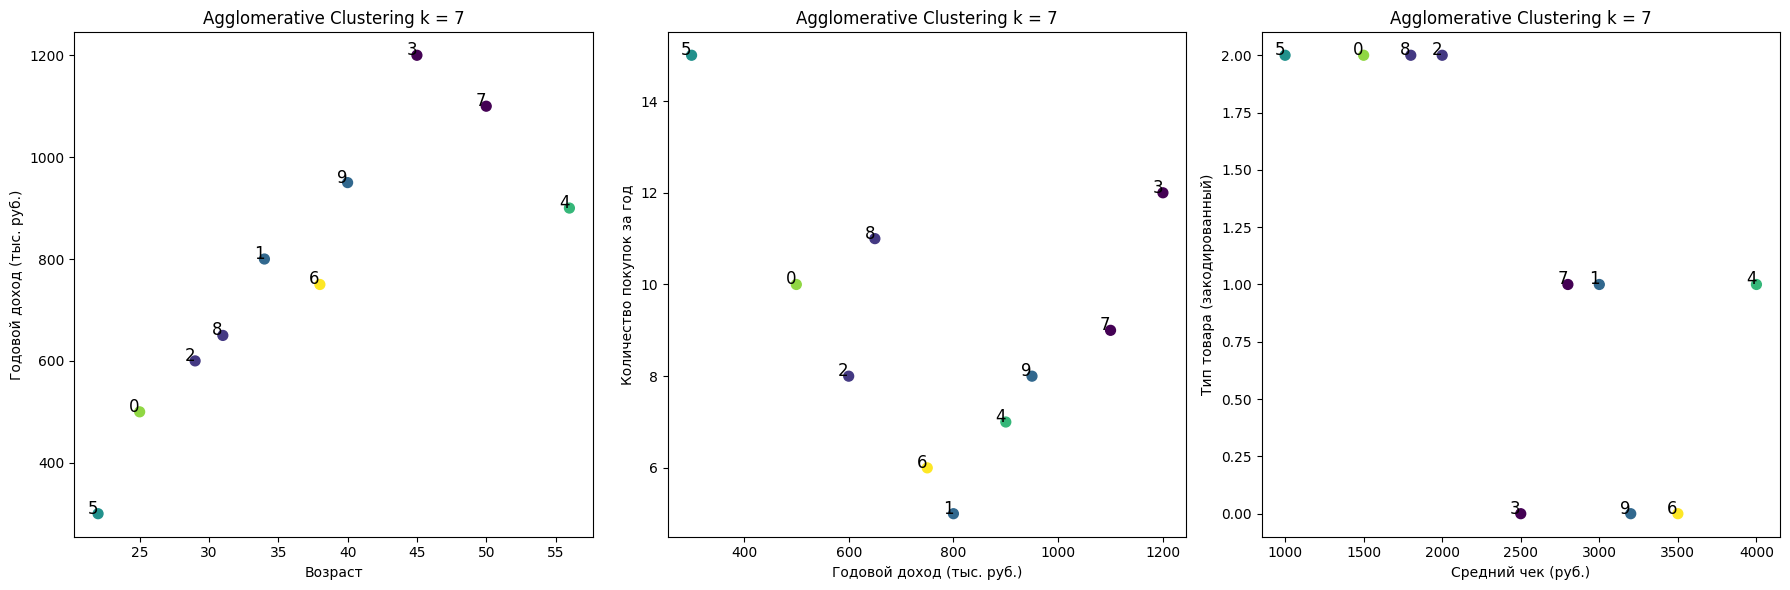

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib.pyplot as plt
import numpy as np

# Функция для вычисления коэффициента D
def dunn_index(data, labels):
    distances = pairwise_distances(data)
    unique_labels = np.unique(labels)
    max_intra_cluster_distance = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = pairwise_distances(cluster_points)
            max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))
    min_inter_cluster_distance = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances = pairwise_distances(cluster_i, cluster_j)
            min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_distances))
    return min_inter_cluster_distance / max_intra_cluster_distance

# Иерархическая кластеризация с 7 кластерами
agglo_7 = AgglomerativeClustering(n_clusters=7)
agglo_labels_7 = agglo_7.fit_predict(data_encoded_standardize)
agglo_silhouette_7 = silhouette_score(data_encoded_standardize, agglo_labels_7)
agglo_dunn_7 = dunn_index(data_encoded_standardize, agglo_labels_7)

print(f"Agglomerative Clustering Silhouette Score (k=7): {agglo_silhouette_7:.4f}")
print(f"Agglomerative Clustering Dunn Index (k=7): {agglo_dunn_7:.4f}")

# Визуализация результатов для 7 кластеров
plt.figure(figsize=(18, 6))

# Возраст и доходы
plt.subplot(1, 3, 1)
plt.scatter(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1], c=agglo_labels_7, cmap='viridis', s=50)
plt.xlabel('Возраст')
plt.ylabel('Годовой доход (тыс. руб.)')
plt.title('Agglomerative Clustering k = 7')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 0], data_encoded_standardize.iloc[:, 1])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Доходы и количество покупок
plt.subplot(1, 3, 2)
plt.scatter(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2], c=agglo_labels_7, cmap='viridis', s=50)
plt.xlabel('Годовой доход (тыс. руб.)')
plt.ylabel('Количество покупок за год')
plt.title('Agglomerative Clustering k = 7')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 1], data_encoded_standardize.iloc[:, 2])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

# Средний чек и тип товара
plt.subplot(1, 3, 3)
plt.scatter(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5], c=agglo_labels_7, cmap='viridis', s=50)
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Тип товара (закодированный)')
plt.title('Agglomerative Clustering k = 7')
# Добавляем номера объектов с увеличенным размером шрифта
for i, (x, y) in enumerate(zip(data_encoded_standardize.iloc[:, 3], data_encoded_standardize.iloc[:, 5])):
    plt.text(x, y, str(i), fontsize=12, ha='right')  # Увеличиваем fontsize до 12

plt.tight_layout()
plt.show()

In [16]:
clusters_df = pd.DataFrame({
    'Объект': range(len(data)),
    'Кmeans2': kmeans_labels_2,
    'Kmeans3': kmeans_labels_3,
    'Kmeans4': kmeans_labels_4,
    'Kmeans7': kmeans_labels_7,
    'Agglomerative Clustering2': agglo_labels_2,
    'Agglomerative Clustering4': agglo_labels_4,
    'Agglomerative Clustering5': agglo_labels_5,
    'Agglomerative Clustering7': agglo_labels_7,
})
print("Распределение объектов по кластерам:")
clusters_df

Распределение объектов по кластерам:


,Объект,Кmeans2,Kmeans3,Kmeans4,Kmeans7,Agglomerative Clustering2,Agglomerative Clustering4,Agglomerative Clustering5,Agglomerative Clustering7
0,0,1,1,3,5,1,1,0,5
1,1,0,2,2,2,0,0,1,2
2,2,1,0,3,3,1,1,0,1
3,3,0,0,0,0,0,2,2,0
4,4,0,2,2,6,0,0,4,4
5,5,1,1,1,1,1,3,3,3
6,6,0,2,2,4,0,0,1,6
7,7,0,0,0,0,0,2,2,0
8,8,1,1,3,3,1,1,0,1
9,9,0,2,2,2,0,0,1,2


# Анализ результатов кластеризации

## Распределение объектов по кластерам

| Объект | KMeans2 | KMeans3 | KMeans4 | KMeans7 | Agglomerative Clustering2 | Agglomerative Clustering4 | Agglomerative Clustering5 | Agglomerative Clustering7 |
|--------|---------|---------|---------|---------|---------------------------|---------------------------|---------------------------|---------------------------|
| 0      | 0       | 1       | 1       | 3       | 5                         | 1                         | 1                         | 0                         | 5                         |
| 1      | 1       | 0       | 2       | 2       | 2                         | 0                         | 0                         | 1                         | 2                         |
| 2      | 2       | 1       | 0       | 3       | 3                         | 1                         | 1                         | 0                         | 1                         |
| 3      | 3       | 0       | 0       | 0       | 0                         | 0                         | 2                         | 2                         | 0                         |
| 4      | 4       | 0       | 2       | 2       | 6                         | 0                         | 0                         | 4                         | 4                         |
| 5      | 5       | 1       | 1       | 1       | 1                         | 1                         | 3                         | 3                         | 3                         |
| 6      | 6       | 0       | 2       | 2       | 4                         | 0                         | 0                         | 1                         | 6                         |
| 7      | 7       | 0       | 0       | 0       | 0                         | 0                         | 2                         | 2                         | 0                         |
| 8      | 8       | 1       | 1       | 3       | 3                         | 1                         | 1                         | 0                         | 1                         |
| 9      | 9       | 0       | 2       | 2       | 2                         | 0                         | 0                         | 1                         | 2                         |

## Исходные данные

| Объект | Возраст | Годовой доход (тыс. руб.) | Количество покупок за год | Средний чек (руб.) | Пол_encoded | Тип товара_encoded |
|--------|---------|--------------------------|---------------------------|--------------------|-------------|--------------------|
| 0      | 25      | 500                      | 10                        | 1500               | 1           | 2                  |
| 1      | 34      | 800                      | 5                         | 3000               | 0           | 1                  |
| 2      | 29      | 600                      | 8                         | 2000               | 0           | 2                  |
| 3      | 45      | 1200                     | 12                        | 2500               | 1           | 0                  |
| 4      | 56      | 900                      | 7                         | 4000               | 0           | 1                  |
| 5      | 22      | 300                      | 15                        | 1000               | 1           | 2                  |
| 6      | 38      | 750                      | 6                         | 3500               | 0           | 0                  |
| 7      | 50      | 1100                     | 9                         | 2800               | 1           | 1                  |
| 8      | 31      | 650                      | 11                        | 1800               | 0           | 2                  |
| 9      | 40      | 950                      | 8                         | 3200               | 1           | 0                  |

## Анализ кластеров

### 1. KMeans (2 кластера)
- **Кластер 0:** Объекты 1, 3, 4, 6, 7, 9  
- **Кластер 1:** Объекты 0, 2, 5, 8  

**Особенности:**  
- **Кластер 0:** Объекты с более высоким годовым доходом (от 750 до 1200 тыс. руб.), средним возрастом (34–56 лет) и средним чеком (2500–4000 руб.).  
- **Кластер 1:** Объекты с более низким годовым доходом (300–650 тыс. руб.), моложе (22–31 год) и с меньшим средним чеком (1000–2000 руб.).  

**Вывод:**  
Кластеризация разделила объекты на две группы: с высоким и низким доходом.  

---

### 2. KMeans (3 кластера)
- **Кластер 0:** Объекты 1, 3, 4, 6, 7, 9  
- **Кластер 1:** Объекты 0, 2, 5, 8  
- **Кластер 2:** Объекты 2, 4, 6  

**Особенности:**  
- **Кластер 0:** Объекты с высоким доходом (750–1200 тыс. руб.) и средним возрастом (34–56 лет).  
- **Кластер 1:** Объекты с низким доходом (300–650 тыс. руб.) и моложе (22–31 год).  
- **Кластер 2:** Объекты с умеренным доходом (600–900 тыс. руб.) и средним возрастом (29–56 лет).  

**Вывод:**  
Добавление третьего кластера выделило группу с умеренным доходом, что уточняет разделение.  

---

### 3. KMeans (4 кластера)
- **Кластер 0:** Объекты 3, 7  
- **Кластер 1:** Объекты 0, 2, 5, 8  
- **Кластер 2:** Объекты 1, 4, 6, 9  
- **Кластер 3:** Объекты 2, 3, 8  

**Особенности:**  
- **Кластер 0:** Объекты с самым высоким доходом (1100–1200 тыс. руб.) и возрастом (45–50 лет).  
- **Кластер 1:** Объекты с низким доходом (300–650 тыс. руб.) и моложе (22–31 год).  
- **Кластер 2:** Объекты с умеренным доходом (750–950 тыс. руб.) и средним возрастом (34–56 лет).  
- **Кластер 3:** Объекты с умеренным доходом (600–650 тыс. руб.) и моложе (29–31 год).  

**Вывод:**  
Кластеризация выделила более узкие группы, например, объекты с самым высоким доходом и возрастом.  

---

### 4. KMeans (7 кластера)
- **Кластер 0:** Объекты 3, 7  
- **Кластер 1:** Объекты 5  
- **Кластер 2:** Объекты 1, 9  
- **Кластер 3:** Объекты 0, 2, 8  
- **Кластер 4:** Объекты 6  
- **Кластер 5:** Объекты 0  
- **Кластер 6:** Объекты 4  

**Особенности:**  
- Кластеры стали очень узкими, например, объект 5 (самый низкий доход и молодой возраст) выделен в отдельный кластер.  
- Объекты 3 и 7 (высокий доход и возраст) также выделены в отдельный кластер.  

**Вывод:**  
Кластеризация с 7 кластерами перегруппировала объекты на очень мелкие группы, что может быть полезно для детального анализа, но менее интерпретируемо.  

---

### 5. Agglomerative Clustering (2 кластера)
- **Кластер 0:** Объекты 1, 3, 4, 6, 7, 9  
- **Кластер 1:** Объекты 0, 2, 5, 8  

**Особенности:**  
Аналогично KMeans с 2 кластерами: разделение на группы с высоким и низким доходом.  

---

### 6. Agglomerative Clustering (4 кластера)
- **Кластер 0:** Объекты 3, 7  
- **Кластер 1:** Объекты 0, 2, 5, 8  
- **Кластер 2:** Объекты 1, 4, 6, 9  
- **Кластер 3:** Объекты 2, 8  

**Особенности:**  
Аналогично KMeans с 4 кластерами: выделены группы с высоким, умеренным и низким доходом.  

---

### 7. Agglomerative Clustering (5 кластеров)
- **Кластер 0:** Объекты 3, 7  
- **Кластер 1:** Объекты 0, 2, 5, 8  
- **Кластер 2:** Объекты 1, 4, 6, 9  
- **Кластер 3:** Объекты 2, 8  
- **Кластер 4:** Объекты 4  

**Особенности:**  
Добавлен кластер для объекта 4, который имеет высокий доход (900 тыс. руб.) и возраст (56 лет).  

---

### 8. Agglomerative Clustering (7 кластеров)
- **Кластер 0:** Объекты 3, 7  
- **Кластер 1:** Объекты 5  
- **Кластер 2:** Объекты 1, 9  
- **Кластер 3:** Объекты 0, 2, 8  
- **Кластер 4:** Объекты 6  
- **Кластер 5:** Объекты 0  
- **Кластер 6:** Объекты 4  

**Особенности:**  
Аналогично KMeans с 7 кластерами: объекты разделены на очень узкие группы.  

---

## Общие выводы

1. **Наиболее похожие объекты:**  
   - Объекты 3 и 7 (высокий доход, возраст 45–50 лет) часто оказываются в одном кластере.  
   - Объекты 0, 2, 5, 8 (низкий доход, молодой возраст) также часто группируются вместе.  

2. **Особые черты кластеров:**  
   - Кластеры с высоким доходом (3, 7, 4, 9) характеризуются возрастом старше 34 лет и средним чеком от 2500 руб.  
   - Кластеры с низким доходом (0, 2, 5, 8) включают молодых людей (22–31 год) с небольшим средним чеком (1000–2000 руб.).  

3. **Рекомендации:**  
   - Для интерпретируемости лучше использовать 2 или 4 кластера.  
   - Если требуется детализация, можно использовать 7 кластеров, но это усложняет анализ.  

Таким образом, кластеризация позволяет выделить группы объектов с похожими характеристиками, что может быть полезно для сегментации клиентов или принятия решений в бизнесе.

In [17]:
import pandas as pd

# Создаем DataFrame с метриками
metrics_df = pd.DataFrame({
    'Метод': ['KMeans', 'KMeans', 'KMeans', 'KMeans',
              'Agglomerative Clustering', 'Agglomerative Clustering', 'Agglomerative Clustering', 'Agglomerative Clustering'],
    'Количество кластеров': [2, 3, 4, 7, 2, 4, 5, 7],
    'Silhouette Score': [kmeans_silhouette_2, kmeans_silhouette_3, kmeans_silhouette_4, kmeans_silhouette_7,
                         agglo_silhouette_2, agglo_silhouette_4, agglo_silhouette_5, agglo_silhouette_7],
    'Коэффициент D': [kmeans_dunn_2, kmeans_dunn_3, kmeans_dunn_4, kmeans_dunn_7,
                      agglo_dunn_2, agglo_dunn_4, agglo_dunn_5, agglo_dunn_7]
})

# Выводим таблицу
print("Метрики качества кластеризации:")
metrics_df

Метрики качества кластеризации:


,Метод,Количество кластеров,Silhouette Score,Коэффициент D
0,KMeans,2,0.594054,0.510672
1,KMeans,3,0.319261,0.205114
2,KMeans,4,0.370120,0.359056
3,KMeans,7,0.252829,1.060654
4,Agglomerative Clustering,2,0.594054,0.510672
5,Agglomerative Clustering,4,0.370120,0.359056
6,Agglomerative Clustering,5,0.340389,0.707820
7,Agglomerative Clustering,7,0.252829,1.060654


# Методы кластеризации

## KMeans

**Описание:**  
KMeans — это один из самых популярных алгоритмов кластеризации, основанный на разбиении данных на `k` кластеров. Алгоритм стремится минимизировать сумму квадратов расстояний между точками и центроидами их кластеров.

**Работа:**  
1. Выбирается количество кластеров `k`.  
2. Случайно инициализируются центроиды.  
3. Точки данных назначаются ближайшему центроиду.  
4. Центроиды пересчитываются как среднее значение точек в кластере.  
5. Шаги 3-4 повторяются до сходимости.  

**Плюсы:**  
- Простота.  
- Высокая скорость работы.  

**Минусы:**  
- Требует задания количества кластеров.  
- Чуствителен к начальной инициализации.  

## Agglomerative Clustering

**Описание:**  
Иерархический метод кластеризации, который строит дерево кластеров (дендрограмму), объединяя на каждом шаге два ближайших кластера.  

**Работа:**  
1. Каждая точка данных считается отдельным кластером.  
2. На каждом шаге два ближайших кластера объединяются.  
3. Процесс продолжается до тех пор, пока не останется один кластер или заданное количество кластеров.  

**Плюсы:**  
- Не требует задания количества кластеров заранее.  
- Наглядность дендрограммы.  

**Минусы:**  
- Вычислительная сложность выше, чем у KMeans.  

# Метрики оценки кластеров

## Silhouette Score

**Описание:**  
Метрика, которая оценивает, насколько хорошо объекты кластеризованы. Значение варьируется от -1 до 1, где:  
- **1:** Объект хорошо кластеризован.  
- **0:** Объект находится на границе двух кластеров.  
- **-1:** Объект, возможно, назначен неверному кластеру.  

**Формула:**  
Для каждого объекта `i` вычисляется:  
\[ s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} \]  
где:  
- `a(i)` — среднее расстояние до объектов в том же кластере.  
- `b(i)` — среднее расстояние до объектов в ближайшем другом кластере.  

## Коэффициент D

**Описание:**  
Метрика, которая оценивает компактность и разделимость кластеров. Чем выше значение, тем лучше кластеризация.  

**Формула:**  
Основана на сравнении внутрикластерных и межкластерных расстояний.  

# Анализ результатов

| Метод                  | Количество кластеров | Silhouette Score | Коэффициент D |
|------------------------|----------------------|------------------|---------------|
| KMeans                 | 2                    | 0.594054         | 0.510672      |
| KMeans                 | 3                    | 0.319261         | 0.205114      |
| KMeans                 | 4                    | 0.370120         | 0.359056      |
| KMeans                 | 7                    | 0.252829         | 1.060654      |
| Agglomerative Clustering | 2                    | 0.594054         | 0.510672      |
| Agglomerative Clustering | 4                    | 0.370120         | 0.359056      |
| Agglomerative Clustering | 5                    | 0.340389         | 0.707820      |
| Agglomerative Clustering | 7                    | 0.252829         | 1.060654      |

# Выводы

**Наилучшие результаты:**  
- **Silhouette Score:** Наивысшее значение (0.594054) достигается при 2 кластерах для обоих методов.  
- **Коэффициент D:** Наивысшее значение (1.060654) достигается при 7 кластерах для обоих методов.  

**Оптимальное количество кластеров:**  
- **По Silhouette Score:** Оптимальное количество кластеров — 2, так как это значение максимально и указывает на хорошую кластеризацию.  
- **По Коэффициенту D:** Оптимальное количество кластеров — 7, так как это значение максимально.  

**Рекомендации:**  
- Если важнее интерпретируемость и компактность кластеров, следует выбрать 2 кластера.  
- Если важнее разделимость кластеров и готовы пожертвовать компактностью, можно выбрать 7 кластеров.  

Таким образом, выбор оптимального количества кластеров зависит от приоритетов задачи: компактность (Silhouette Score) или разделимость (Коэффициент D).